In [1]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
table = pd.read_csv('consolidado.csv')
table.head()
#vsm x =valor del salario minimo febrero
#vsm y =valor del salario enero

,key,vsm_actual_x,SaldoInsolutoActual_x,PagosVencidosMeses_x,vsm_actual_y,SaldoInsolutoActual_y,PagosVencidosMeses_y,estado
0,0,2686.144,204.43,0,2686.144,203.19,0,Jalisco
1,1,2686.144,42.63,0,2686.144,42.78,0,Jalisco
2,2,2686.144,189.87,0,2686.144,190.63,0,Jalisco
3,3,2686.144,51.81,0,2686.144,52.00,0,Jalisco
4,4,2686.144,197.55,0,2686.144,194.85,0,Jalisco


In [2]:
table.columns


Index(['key', 'vsm_actual_x', 'SaldoInsolutoActual_x', 'PagosVencidosMeses_x',
       'vsm_actual_y', 'SaldoInsolutoActual_y', 'PagosVencidosMeses_y',
       'estado'],
      dtype='object')

In [3]:
table["vsm_enero"] = table["vsm_actual_y"]
table["vsm_febrero"] = table["vsm_actual_x"]
table["PagosVencidos_enero"] = table["PagosVencidosMeses_y"]
table["PagosVencidos_febrero"] = table["PagosVencidosMeses_x"]
table["RemainingDebt_enero"] = table["SaldoInsolutoActual_y"]
table["RemainingDebt_febrero"] = table["SaldoInsolutoActual_x"]

Table = table[["key", "vsm_enero", "vsm_febrero", "PagosVencidos_enero", "PagosVencidos_febrero", "RemainingDebt_enero", "RemainingDebt_febrero", "estado"]]
Table.head()


,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado
0,0,2686.144,2686.144,0,0,203.19,204.43,Jalisco
1,1,2686.144,2686.144,0,0,42.78,42.63,Jalisco
2,2,2686.144,2686.144,0,0,190.63,189.87,Jalisco
3,3,2686.144,2686.144,0,0,52.00,51.81,Jalisco
4,4,2686.144,2686.144,0,0,194.85,197.55,Jalisco


In [4]:
Estados = Table["estado"].value_counts()
#print(Estados)
#print(len(Estados))

In [5]:
Table["PagosVencidos_enero"].value_counts()

0    16856
1     1289
2      248
3       53
Name: PagosVencidos_enero, dtype: int64

In [6]:
Table["PagosVencidos_febrero"].value_counts()

0    16509
1     1490
2      344
3       72
4       31
Name: PagosVencidos_febrero, dtype: int64

In [7]:
PagosVencidos_dos = Table["PagosVencidos_enero"] - Table["PagosVencidos_febrero"]
PagosVencidos_dos.value_counts()

 0    16636
-1     1223
 1      535
 2       42
 3       10
dtype: int64

In [8]:
Table.head()

,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado
0,0,2686.144,2686.144,0,0,203.19,204.43,Jalisco
1,1,2686.144,2686.144,0,0,42.78,42.63,Jalisco
2,2,2686.144,2686.144,0,0,190.63,189.87,Jalisco
3,3,2686.144,2686.144,0,0,52.00,51.81,Jalisco
4,4,2686.144,2686.144,0,0,194.85,197.55,Jalisco


In [9]:
Table["saldo_pesosE"] = Table["vsm_enero"]*Table["RemainingDebt_enero"]
Table["saldo_pesosF"] = Table["vsm_febrero"]*Table["RemainingDebt_febrero"]
Table["DueDaysE"] = Table["PagosVencidos_enero"]*30
Table["DueDaysF"] = Table["PagosVencidos_febrero"]*30
Table.head()

C:\Users\justi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\justi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\justi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado,saldo_pesosE,saldo_pesosF,DueDaysE,DueDaysF
0,0,2686.144,2686.144,0,0,203.19,204.43,Jalisco,545797.59936,549128.41792,0,0
1,1,2686.144,2686.144,0,0,42.78,42.63,Jalisco,114913.24032,114510.31872,0,0
2,2,2686.144,2686.144,0,0,190.63,189.87,Jalisco,512059.63072,510018.16128,0,0
3,3,2686.144,2686.144,0,0,52.00,51.81,Jalisco,139679.48800,139169.12064,0,0
4,4,2686.144,2686.144,0,0,194.85,197.55,Jalisco,523395.15840,530647.74720,0,0


In [10]:
Table["DueDaysE"].value_counts()

0     16856
30     1289
60      248
90       53
Name: DueDaysE, dtype: int64

In [11]:
Table["DueDaysF"].value_counts()

0      16509
30      1490
60       344
90        72
120       31
Name: DueDaysF, dtype: int64

In [12]:
len(Table)

18446

In [13]:
Performance_Stay = Table.loc[Table["DueDaysE"] == Table["DueDaysF"] , :]
Performance_Stay["Performance"] = "stay"
Performance_Stay.head()
#Performance_Stay.count()

C:\Users\justi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado,saldo_pesosE,saldo_pesosF,DueDaysE,DueDaysF,Performance
0,0,2686.144,2686.144,0,0,203.19,204.43,Jalisco,545797.59936,549128.41792,0,0,stay
1,1,2686.144,2686.144,0,0,42.78,42.63,Jalisco,114913.24032,114510.31872,0,0,stay
2,2,2686.144,2686.144,0,0,190.63,189.87,Jalisco,512059.63072,510018.16128,0,0,stay
3,3,2686.144,2686.144,0,0,52.00,51.81,Jalisco,139679.48800,139169.12064,0,0,stay
4,4,2686.144,2686.144,0,0,194.85,197.55,Jalisco,523395.15840,530647.74720,0,0,stay


In [14]:
Performance_Rol = Table.loc[Table["DueDaysE"] < Table["DueDaysF"] , :]
Performance_Rol["Performance"] = "Rol"
Performance_Rol.head()

C:\Users\justi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado,saldo_pesosE,saldo_pesosF,DueDaysE,DueDaysF,Performance
9,9,2686.144,2686.144,0,1,114.24,115.02,Jalisco,306865.09056,308960.28288,0,30,Rol
13,13,2686.144,2686.144,1,2,166.01,166.58,Jalisco,445926.76544,447457.86752,30,60,Rol
17,17,2686.144,2686.144,0,1,102.93,102.08,Jalisco,276484.80192,274201.57952,0,30,Rol
24,24,2686.144,2686.144,0,1,77.36,77.09,Jalisco,207800.09984,207074.84096,0,30,Rol
30,30,2686.144,2686.144,0,1,128.72,129.51,Jalisco,345760.45568,347882.50944,0,30,Rol


In [15]:
Performance_Cure = Table.loc[Table["DueDaysE"] > Table["DueDaysF"] , :]
Performance_Cure["Performance"] = "Cure"
Performance_Cure.head()

C:\Users\justi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado,saldo_pesosE,saldo_pesosF,DueDaysE,DueDaysF,Performance
45,45,2686.144,2686.144,1,0,94.21,93.01,Jalisco,253061.62624,249838.25344,30,0,Cure
77,77,2686.144,2686.144,1,0,92.44,91.08,Jalisco,248307.15136,244653.99552,30,0,Cure
85,85,2686.144,2686.144,1,0,189.04,181.20,San Luis Potosi,507788.66176,486729.29280,30,0,Cure
211,211,2686.144,2686.144,1,0,127.18,123.16,San Luis Potosi,341623.79392,330825.49504,30,0,Cure
277,277,2686.144,2686.144,1,0,139.98,139.32,San Luis Potosi,376006.43712,374233.58208,30,0,Cure


In [16]:
PerformanceT = [Performance_Stay, Performance_Rol, Performance_Cure]
result = pd.concat(PerformanceT)
result.head()
len(result)

18446

In [17]:
result["Performance"].value_counts()

stay    16636
Rol      1223
Cure      587
Name: Performance, dtype: int64

In [18]:
Table["jump"] = Table["DueDaysE"] - Table["DueDaysF"]
Table.head()

C:\Users\justi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado,saldo_pesosE,saldo_pesosF,DueDaysE,DueDaysF,jump
0,0,2686.144,2686.144,0,0,203.19,204.43,Jalisco,545797.59936,549128.41792,0,0,0
1,1,2686.144,2686.144,0,0,42.78,42.63,Jalisco,114913.24032,114510.31872,0,0,0
2,2,2686.144,2686.144,0,0,190.63,189.87,Jalisco,512059.63072,510018.16128,0,0,0
3,3,2686.144,2686.144,0,0,52.00,51.81,Jalisco,139679.48800,139169.12064,0,0,0
4,4,2686.144,2686.144,0,0,194.85,197.55,Jalisco,523395.15840,530647.74720,0,0,0


In [19]:
Table["jump"].value_counts()

 0     16636
-30     1223
 30      535
 60       42
 90       10
Name: jump, dtype: int64

In [20]:
Performance_RolJ["jump"].value_counts()

NameError: name 'Performance_RolJ' is not defined

In [21]:
State_Count_Key = Table.groupby('estado')['key'].nunique()
print(State_Count_Key)

estado
Aguascalientes          161
Baja California        1985
Baja California Sur     579
Campeche                 24
Chiapas                 197
Chihuahua               979
Coahuila                409
Colima                   60
Distrito Federal        408
Durango                  52
Estado de Mexico       2339
Guanajuato              517
Guerrero                162
Hidalgo                  88
Jalisco                2354
Michoacan               206
Morelos                 109
Nayarit                 202
Nuevo Leon             1532
Oaxaca                  328
Puebla                  539
Queretaro               379
Quintana Roo            987
San Luis Potosi         894
Sinaloa                 578
Sonora                  697
Tabasco                  60
Tamaulipas              980
Tlaxcala                 14
Veracruz                523
Yucatan                  44
Zacatecas                60
Name: key, dtype: int64


In [22]:
State_Count_Key_df = pd.DataFrame(State_Count_Key)
State_Count_Key_df = State_Count_Key_df.reset_index()
State_Count_Key_df.head()

,estado,key
0,Aguascalientes,161
1,Baja California,1985
2,Baja California Sur,579
3,Campeche,24
4,Chiapas,197


In [23]:
x_axis = np.arange(len(State_Count_Key_df))
tick_locations = [value+0.4 for value in x_axis]

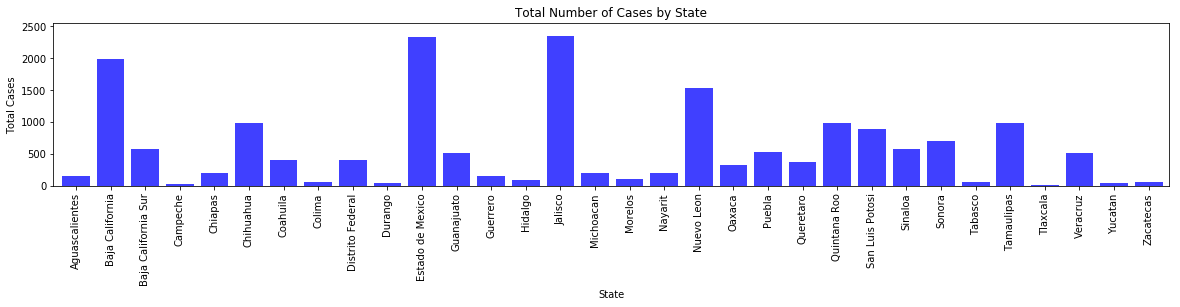

In [24]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, State_Count_Key_df['key'], color='b', alpha=0.75, align="edge")
plt.xticks(tick_locations, State_Count_Key_df['estado'], rotation= "vertical")
plt.ylim(0, max(State_Count_Key_df["key"])+200)
plt.xlim(-0.25, len(x_axis))

plt.title("Total Number of Cases by State")
plt.xlabel("State")
plt.ylabel("Total Cases")
# Save our graph and show the grap
plt.show()

In [25]:
State_Count_Vencidos_Enero = Table.groupby('estado')['PagosVencidos_enero'].nunique()

In [26]:
State_Count_Vencidos_Febrero = Table.groupby('estado')['PagosVencidos_febrero'].nunique()

In [27]:
State_Count_Vencidos_Enero_df = pd.DataFrame(State_Count_Vencidos_Enero)
State_Count_Vencidos_Enero_df = State_Count_Vencidos_Enero_df.reset_index()
State_Count_Vencidos_Enero_df.head()

,estado,PagosVencidos_enero
0,Aguascalientes,2
1,Baja California,4
2,Baja California Sur,3
3,Campeche,4
4,Chiapas,3


In [28]:
State_Count_Vencidos_Febrero_df = pd.DataFrame(State_Count_Vencidos_Febrero)
State_Count_Vencidos_Febrero_df = State_Count_Vencidos_Febrero_df.reset_index()
State_Count_Vencidos_Febrero_df.head()

,estado,PagosVencidos_febrero
0,Aguascalientes,3
1,Baja California,5
2,Baja California Sur,4
3,Campeche,4
4,Chiapas,4


In [29]:
x_axis = np.arange(len(State_Count_Vencidos_Enero_df))
tick_locations = [value+0.4 for value in x_axis]

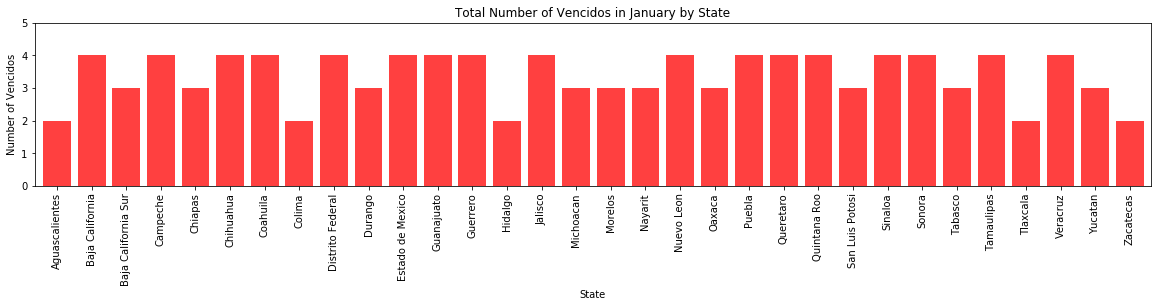

In [30]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, State_Count_Vencidos_Enero_df['PagosVencidos_enero'], color='r', alpha=0.75, align="edge")
plt.xticks(tick_locations, State_Count_Vencidos_Enero_df['estado'], rotation= "vertical")
plt.ylim(0, max(State_Count_Vencidos_Enero_df["PagosVencidos_enero"])+1)
plt.xlim(-0.25, len(x_axis))

plt.title("Total Number of Vencidos in January by State")
plt.xlabel("State")
plt.ylabel("Number of Vencidos")
# Save our graph and show the grap
plt.show()

In [31]:
x_axis = np.arange(len(State_Count_Vencidos_Febrero_df))
tick_locations = [value+0.4 for value in x_axis]

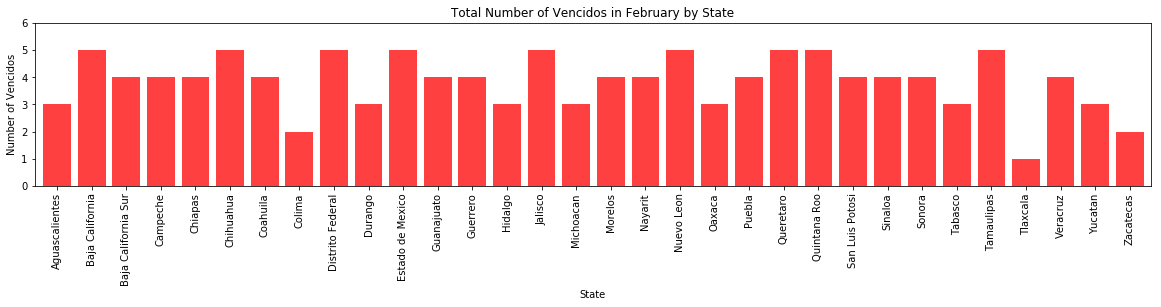

In [32]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, State_Count_Vencidos_Febrero_df['PagosVencidos_febrero'], color='r', alpha=0.75, align="edge")
plt.xticks(tick_locations, State_Count_Vencidos_Febrero_df['estado'], rotation= "vertical")
plt.ylim(0, max(State_Count_Vencidos_Febrero_df["PagosVencidos_febrero"])+1)
plt.xlim(-0.25, len(x_axis))

plt.title("Total Number of Vencidos in February by State")
plt.xlabel("State")
plt.ylabel("Number of Vencidos")
# Save our graph and show the grap
plt.show()

In [33]:
Total_Vencidos_Per_State_Enero_Febrero = Table.groupby('estado')["key", "PagosVencidos_enero", "PagosVencidos_febrero"].nunique()
print(Total_Vencidos_Per_State_Enero_Febrero)

                      key  PagosVencidos_enero  PagosVencidos_febrero
estado                                                               
Aguascalientes        161                    2                      3
Baja California      1985                    4                      5
Baja California Sur   579                    3                      4
Campeche               24                    4                      4
Chiapas               197                    3                      4
Chihuahua             979                    4                      5
Coahuila              409                    4                      4
Colima                 60                    2                      2
Distrito Federal      408                    4                      5
Durango                52                    3                      3
Estado de Mexico     2339                    4                      5
Guanajuato            517                    4                      4
Guerrero            

In [61]:
Total_Vencidos_Per_State_Enero_Febrero_df = pd.DataFrame(Total_Vencidos_Per_State_Enero_Febrero)
Total_Vencidos_Per_State_Enero_Febrero_df = Total_Vencidos_Per_State_Enero_Febrero_df.reset_index()
Total_Vencidos_Per_State_Enero_Febrero_df['Total_Vencidos']= State_Count_Vencidos_Febrero_df['PagosVencidos_febrero']-(State_Count_Vencidos_Enero_df['PagosVencidos_enero'])
Total_Vencidos_Per_State_Enero_Febrero_df.head()

,estado,key,PagosVencidos_enero,PagosVencidos_febrero,Total_Vencidos
0,Aguascalientes,161,2,3,1
1,Baja California,1985,4,5,1
2,Baja California Sur,579,3,4,1
3,Campeche,24,4,4,0
4,Chiapas,197,3,4,1


In [51]:
x_axis = np.arange(len(Total_Vencidos_Per_State_Enero_Febrero_df))
tick_locations = [value+0.4 for value in x_axis]

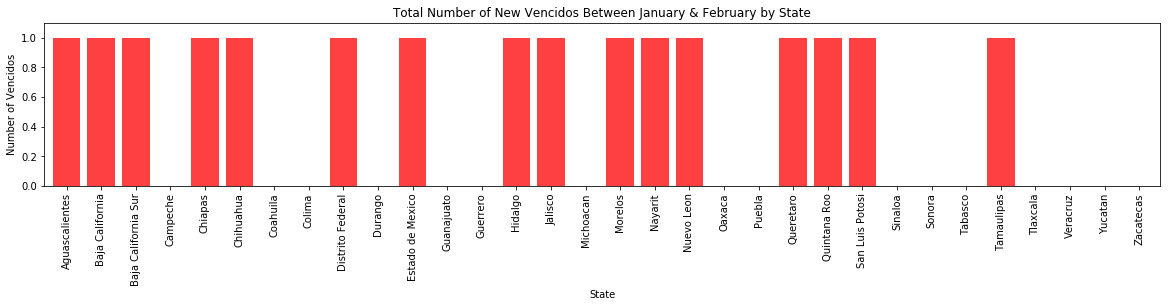

In [56]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, Total_Vencidos_Per_State_Enero_Febrero_df['Total_Vencidos'], color='r', alpha=0.75, align="edge")
plt.xticks(tick_locations, Total_Vencidos_Per_State_Enero_Febrero_df['estado'], rotation= "vertical")
plt.ylim(0, max(Total_Vencidos_Per_State_Enero_Febrero_df["Total_Vencidos"])+0.1)
plt.xlim(-0.25, len(x_axis))

plt.title("Total Number of New Vencidos Between January & February by State")
plt.xlabel("State")
plt.ylabel("Number of Vencidos")
# Save our graph and show the grap
plt.show()

In [47]:
Percentage_Vencidos_Per_State_Enero = Table.groupby('estado')["key", "PagosVencidos_enero"].nunique()

In [48]:
Percentage_Vencidos_Per_State_Febrero = Table.groupby('estado')["key", "PagosVencidos_febrero"].nunique()

In [49]:
Percentage_Vencidos_Per_State_Enero_df = pd.DataFrame(Percentage_Vencidos_Per_State_Enero)
Percentage_Vencidos_Per_State_Enero_df = Percentage_Vencidos_Per_State_Enero_df.reset_index()
Percentage_Vencidos_Per_State_Enero_df['PercentageVencidos_enero']= round(State_Count_Vencidos_Enero_df['PagosVencidos_enero']/State_Count_Key_df['key']*100,3)
Percentage_Vencidos_Per_State_Enero_df ['AverageVencidos_ene-feb']= round(Percentage_Vencidos_Per_State_Enero_df['PercentageVencidos_enero']+Percentage_Vencidos_Per_State_Febrero_df['PercentageVencidos_febrero'],2)/2
Percentage_Vencidos_Per_State_Enero_df.head()

,estado,key,PagosVencidos_enero,PercentageVencidos_enero,AverageVencidos_ene-feb
0,Aguascalientes,161,2,1.242,1.550
1,Baja California,1985,4,0.202,0.225
2,Baja California Sur,579,3,0.518,0.605
3,Campeche,24,4,16.667,16.665
4,Chiapas,197,3,1.523,1.775


In [60]:
Percentage_Vencidos_Per_State_Febrero_df = pd.DataFrame(Percentage_Vencidos_Per_State_Febrero)
Percentage_Vencidos_Per_State_Febrero_df = Percentage_Vencidos_Per_State_Febrero_df.reset_index()
Percentage_Vencidos_Per_State_Febrero_df['PercentageVencidos_febrero']= round(State_Count_Vencidos_Febrero_df['PagosVencidos_febrero']/State_Count_Key_df['key']*100,3)
Percentage_Vencidos_Per_State_Febrero_df ['AverageVencidos_ene-feb']= round(Percentage_Vencidos_Per_State_Enero_df['PercentageVencidos_enero']+Percentage_Vencidos_Per_State_Febrero_df['PercentageVencidos_febrero'],2)/2
Percentage_Vencidos_Per_State_Febrero_df.head()

,estado,key,PagosVencidos_febrero,PercentageVencidos_febrero,AverageVencidos_ene-feb
0,Aguascalientes,161,3,1.863,1.550
1,Baja California,1985,5,0.252,0.225
2,Baja California Sur,579,4,0.691,0.605
3,Campeche,24,4,16.667,16.665
4,Chiapas,197,4,2.030,1.775


In [41]:
x_axis = np.arange(len(Percentage_Vencidos_Per_State_Enero_df))
tick_locations = [value+0.4 for value in x_axis]

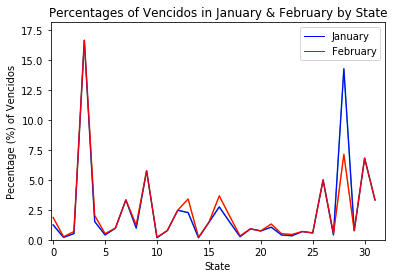

In [42]:
# Plot both months' percentages of vencidos on the same chart for monthly comparison
# I can't manage to get the state names on the X-AXIS
January = (Percentage_Vencidos_Per_State_Enero_df['PercentageVencidos_enero'])
February = (Percentage_Vencidos_Per_State_Febrero_df['PercentageVencidos_febrero'])
plt.plot(x_axis, January)
plt.plot(x_axis, February)

plt.ylim(0, max(Percentage_Vencidos_Per_State_Enero_df['PercentageVencidos_enero'])+1.5)
plt.xlim(-0.25, len(x_axis))

# Create a handle for each plot
January, = plt.plot(x_axis, January, color="blue", linewidth=1, label="January")
February, = plt.plot(x_axis, February, color="Red", linewidth=1, label="February")

plt.legend(handles=[January, February], loc="best")

plt.title("Percentages of Vencidos in January & February by State")
plt.xlabel("State")
plt.ylabel("Pecentage (%) of Vencidos")

plt.show()

In [43]:
x_axis = np.arange(len(Percentage_Vencidos_Per_State_Enero_df))
tick_locations = [value+0.4 for value in x_axis]

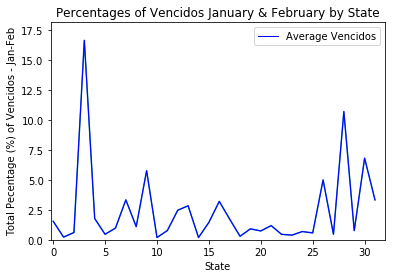

In [57]:
# Plot AVERAGE VENCIDOS PER MONTH......this would be a good plot to include the UNEMPLOYMENT RATES as comparison
# I still can't manage to put the state names on the X-AXIS
Average = (Percentage_Vencidos_Per_State_Febrero_df ['AverageVencidos_ene-feb'])
plt.plot(x_axis, Average)

plt.ylim(0, max(Percentage_Vencidos_Per_State_Febrero_df ['AverageVencidos_ene-feb'])+1.5)
plt.xlim(-0.25, len(x_axis))

# Create a handle for each plot
Average, = plt.plot(x_axis, Average, color="blue", linewidth=1, label="Average Vencidos")

plt.legend(handles=[Average], loc="best")

plt.title("Percentages of Vencidos January & February by State")
plt.xlabel("State")
plt.ylabel("Total Pecentage (%) of Vencidos - Jan-Feb")

plt.show()

Text(0.5, 1.0, 'Performance Measurements')

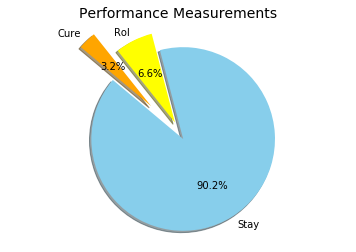

In [45]:
#Performance - measured by stay 16636, Rol 1223, Cure 587
Performance_Measurement = result["Performance"].value_counts()

#Labels for the three sections by measurement type
labels = ["Stay","Rol","Cure"]

#Color for the three sections of the Total Fares by City Type pie chart
colors = ["SkyBlue", "Yellow", "Orange"]

#Seperate the majority value from the pie chart
explode = (0, 0.2, 0.5)

#Create the pie chart based upon the above data
plt.pie(Performance_Measurement, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#Create axes which are equal so we have a perfect circle
plt.axis("equal")

#Pie Chart Title
plt.title("Performance Measurements", fontsize = 14)


Text(0.5, 1.0, 'Jump Measurements')

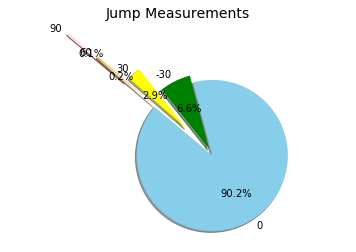

In [46]:
#Jumps, (0)16636, (-30)1223, (30)535, (60)42, (90)10
# IN NEED OF IDEAS TO FIND A MORE EFFECTIVE WAY TO MAKE NUMBERS/LABELS CLEAR IN THIS CHART
Jump_Measurement = Table["jump"].value_counts()

#Labels for the three sections by measurement type
labels = [0, -30, 30, 60, 90]

#Color for the three sections of the Total Fares by City Type pie chart
colors = ["SkyBlue", "Green", "Yellow","Orange","Red"]

#Seperate the majority value from the pie chart
explode = (0, 0.1, 0.5, 1, 1.5)

#Create the pie chart based upon the above data
plt.pie(Jump_Measurement, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#Create axes which are equal so we have a perfect circle
plt.axis("equal")

#Pie Chart Title
plt.title("Jump Measurements", fontsize = 14)